# 🏭 VisionGuard AI — Industrial Screw Defect Detection
##  Developer Name: Waqar Abid

---
##  Project Overview
This project focuses on **real-time defect detection** in industrial screws using **Deep Learning (PyTorch)**.  
The dataset consists of *normal (good)* screws and several defect categories such as scratches, manipulations, and thread issues. 

The final system will:  
- Detect defects in screws from images and video streams   
- Provide high accuracy & fast inference  

---

##  Dataset Information
I am using the **MVTec Screw Dataset**, which contains images categorized into:  
- `good` (non-defective screws)  `scratch_head`, `scratch_neck`, `thread_side`, `thread_top`, `manipulated_front` (different defect types)  




---

##  Libraries Used
We will use the following libraries for **data loading, visualization, and exploratory analysis**:

- `os` → File and directory handling  
- `matplotlib` & `seaborn` → Data visualization  
- `PIL` → Image loading and display  
- `glob` → File path searching  
- `random` → Sampling images for visualization  

---


In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from glob import glob
from PIL import Image
import pandas as pd

# Show plots inline
%matplotlib inline

##  Dataset Paths
We will now define the dataset directory paths for:
- Training data
- Testing data
- Ground-truth masks


In [4]:
#  Define Dataset Paths

base_dir = r"E:\Final project of Ats\screw_dataset"

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
ground_truth_dir = os.path.join(base_dir, "ground_truth")

print(" Train Directory:", train_dir)
print(" Test Directory:", test_dir)
print(" Ground Truth Directory:", ground_truth_dir)


 Train Directory: E:\Final project of Ats\screw_dataset\train
 Test Directory: E:\Final project of Ats\screw_dataset\test
 Ground Truth Directory: E:\Final project of Ats\screw_dataset\ground_truth


##  Check Dataset Classes and Distribution
I will:
1. List all class names (good, scratch_head, etc.)
2. Count the number of images per class
4. Pie charts of class distribution
5. Image grids per defect type
7. Heatmap of train vs test distribution



In [5]:
#  Get Class Names
train_classes = os.listdir(train_dir)
test_classes = os.listdir(test_dir)

print(" Train Classes:", train_classes)
print(" Test Classes:", test_classes)

#  Count Images per Class
train_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) 
                if os.path.isdir(os.path.join(train_dir, cls)) else 0
                for cls in train_classes}

test_counts = {cls: len(os.listdir(os.path.join(test_dir, cls))) 
               if os.path.isdir(os.path.join(test_dir, cls)) else 0
               for cls in test_classes}




 Train Classes: ['good', 'manipulated_front', 'scratch_head', 'scratch_neck', 'thread_side', 'thread_top']
 Test Classes: ['good', 'manipulated_front', 'scratch_head', 'scratch_neck', 'thread_side', 'thread_top']


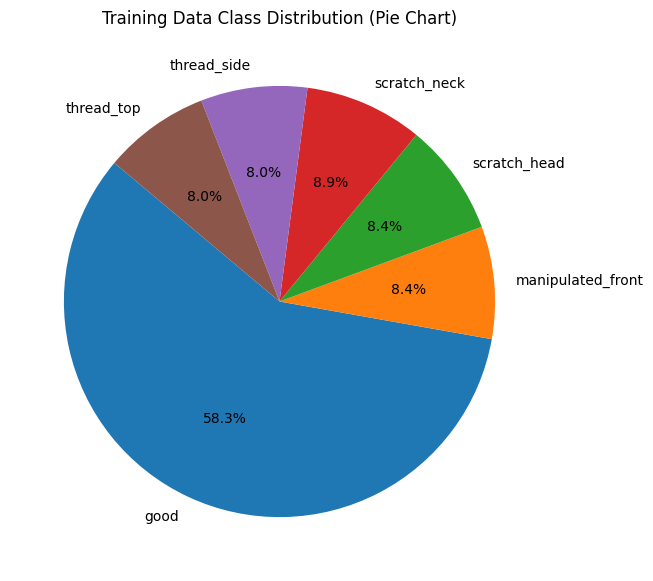

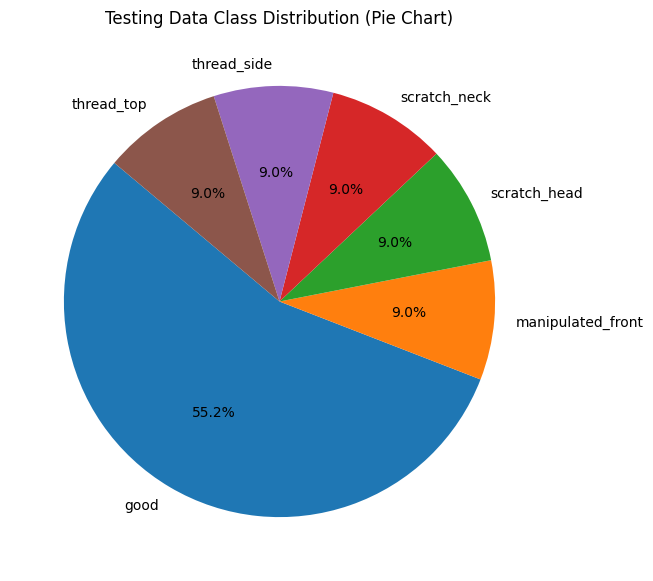

In [15]:
#  Pie Chart for Training Classes
plt.figure(figsize=(7,7))
plt.pie(train_counts.values(), labels=train_counts.keys(), autopct="%1.1f%%", startangle=140)
plt.title("Training Data Class Distribution (Pie Chart)")
plt.show()

#  Pie Chart for Testing Classes
plt.figure(figsize=(7,7))
plt.pie(test_counts.values(), labels=test_counts.keys(), autopct="%1.1f%%", startangle=140)
plt.title("Testing Data Class Distribution (Pie Chart)")
plt.show()


 Grid of Training Images by Class:


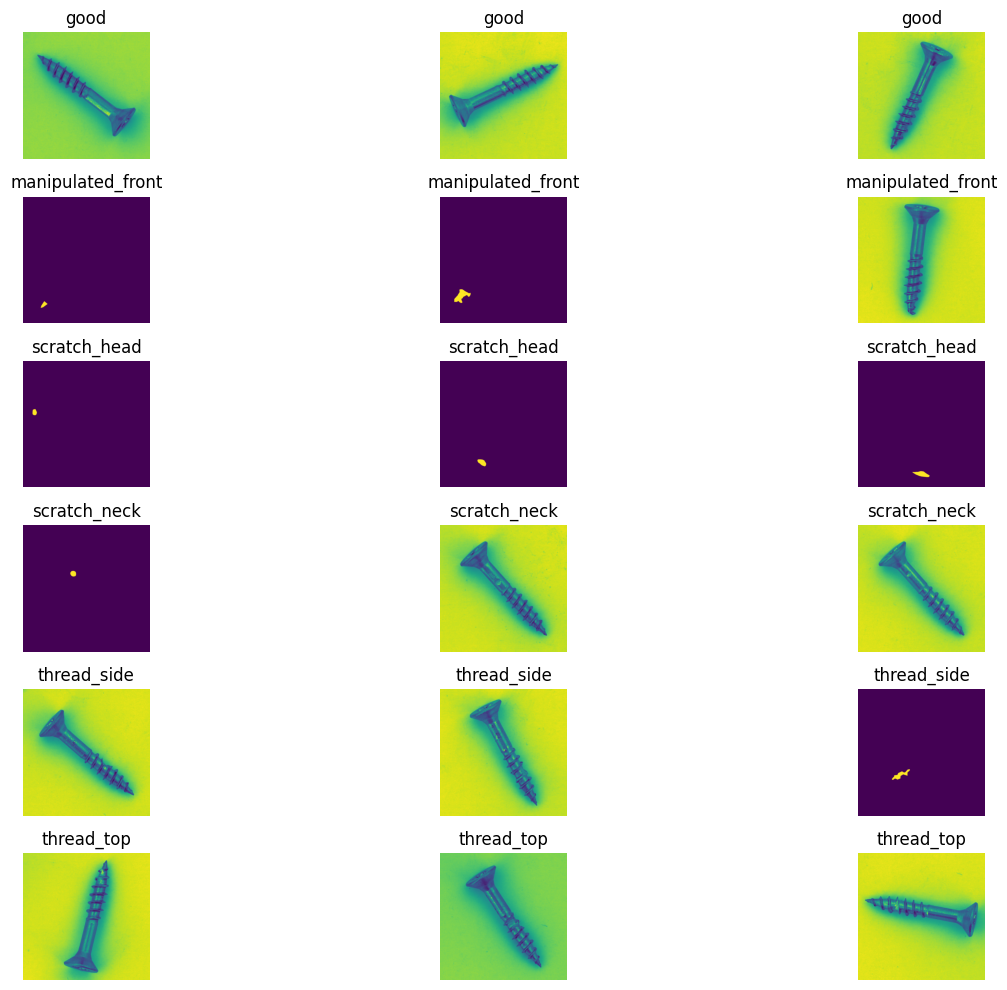

In [6]:
#  Grid Visualization: Show 3 images per class
def show_class_grid(folder, classes, n=3):
    plt.figure(figsize=(15, 10))
    for i, cls in enumerate(classes):
        class_path = os.path.join(folder, cls)
        images = glob(os.path.join(class_path, "*"))
        samples = random.sample(images, min(n, len(images)))
        for j, img_path in enumerate(samples):
            img = Image.open(img_path)
            plt.subplot(len(classes), n, i*n + j + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(cls)
    plt.tight_layout()
    plt.show()

print(" Grid of Training Images by Class:")
show_class_grid(train_dir, train_classes, n=3)


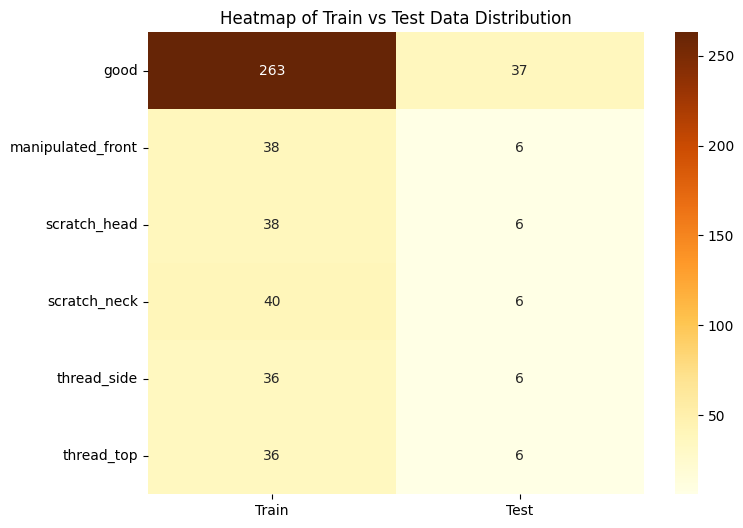

In [7]:
#  Heatmap of Train vs Test Distribution
import pandas as pd

df_counts = pd.DataFrame({
    "Train": train_counts,
    "Test": test_counts
}).fillna(0)

plt.figure(figsize=(8,6))
sns.heatmap(df_counts, annot=True, fmt=".0f", cmap="YlOrBr")
plt.title("Heatmap of Train vs Test Data Distribution")
plt.show()


##  Visualize Sample Images
Now we will display random samples from the dataset to understand the variations in:
- Good screws
- Defective screws



 Sample Training Images:


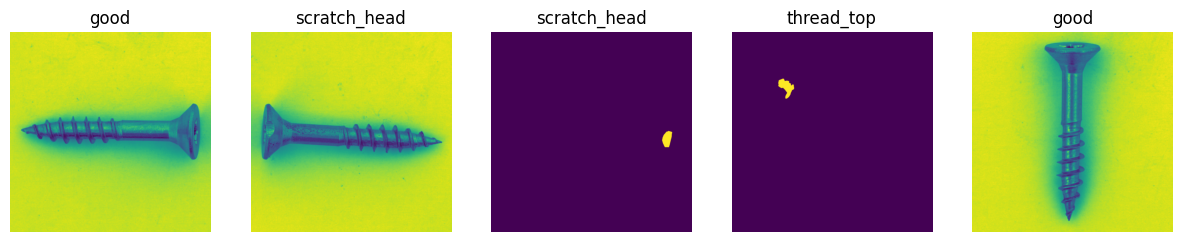


 Sample Testing Images:


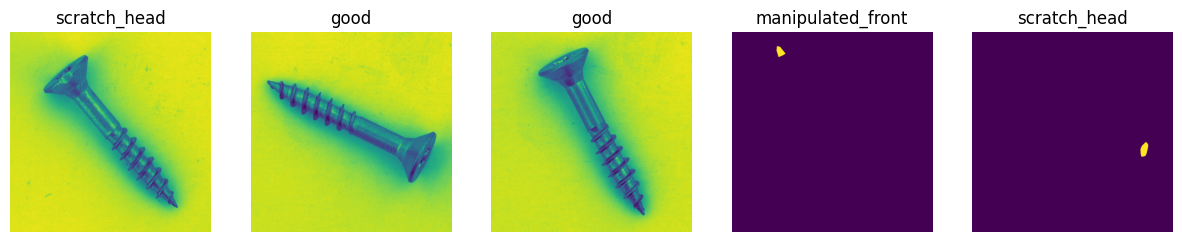

In [13]:
#  Function to Show Random Sample Images
def show_samples(folder, n=5):
    all_images = glob(os.path.join(folder, "*", "*"))
    samples = random.sample(all_images, min(n, len(all_images)))
    plt.figure(figsize=(15,5))
    for i, img_path in enumerate(samples):
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(os.path.basename(os.path.dirname(img_path)))
    plt.show()

print("\n Sample Training Images:")
show_samples(train_dir)

print("\n Sample Testing Images:")
show_samples(test_dir)
